| Algorithm               | Key Idea                              | When to Use                         |
| ----------------------- | ------------------------------------- | ----------------------------------- |
| **K-Means**             | Assign points to k centroids          | Fast, widely used                   |
| **DBSCAN**              | Group by density of points            | Detects outliers, arbitrary shapes  |
| **Agglomerative**       | Merge closest clusters hierarchically | Good for small datasets, dendrogram |
| **Spectral Clustering** | Use graph structure (eigenvectors)    | Good for non-convex shapes          |
| **Gaussian Mixture**    | Soft probabilistic clustering         | When clusters may overlap           |


# Hierarchical Clustering

Hierarchical Clustering builds a tree-like structure of nested clusters called a dendrogram. It comes in two main types:
| Type              | Description                                                     |
| ----------------- | --------------------------------------------------------------- |
| **Agglomerative** | Bottom-up: Start with each point as its own cluster, then merge |
| **Divisive**      | Top-down: Start with one big cluster, then split                |


| Use **Hierarchical Clustering** when:                           |
| --------------------------------------------------------------- |
| You want to **see how clusters form** step-by-step (dendrogram) |
| You don’t know how many clusters you need                       |
| You’re working with a **small to medium** dataset               |


| Feature                | **Hierarchical Clustering**                | **K-Means**                             |
| ---------------------- | ------------------------------------------ | --------------------------------------- |
| **Type**               | Unsupervised                               | Unsupervised                            |
| **Input**              | Raw data (no labels)                       | Raw data (no labels)                    |
| **Number of clusters** | Not required upfront (can choose after)    | Must specify `k` in advance             |
| **Cluster shape**      | Works with arbitrary shapes                | Assumes spherical clusters              |
| **Deterministic?**     | ✅ Yes (same result every time)             | ❌ No (random init can change results)   |
| **Scalability**        | Slower, not ideal for large datasets       | Fast, suitable for large datasets       |
| **Output**             | Dendrogram (cluster tree)                  | Final cluster labels and centroids      |
| **Best use cases**     | Small datasets, hierarchical relationships | Large datasets, quick flat partitioning |


In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target  # we won't use this for clustering, but can evaluate later


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Plot the Dendrogram (Optional but insightful)

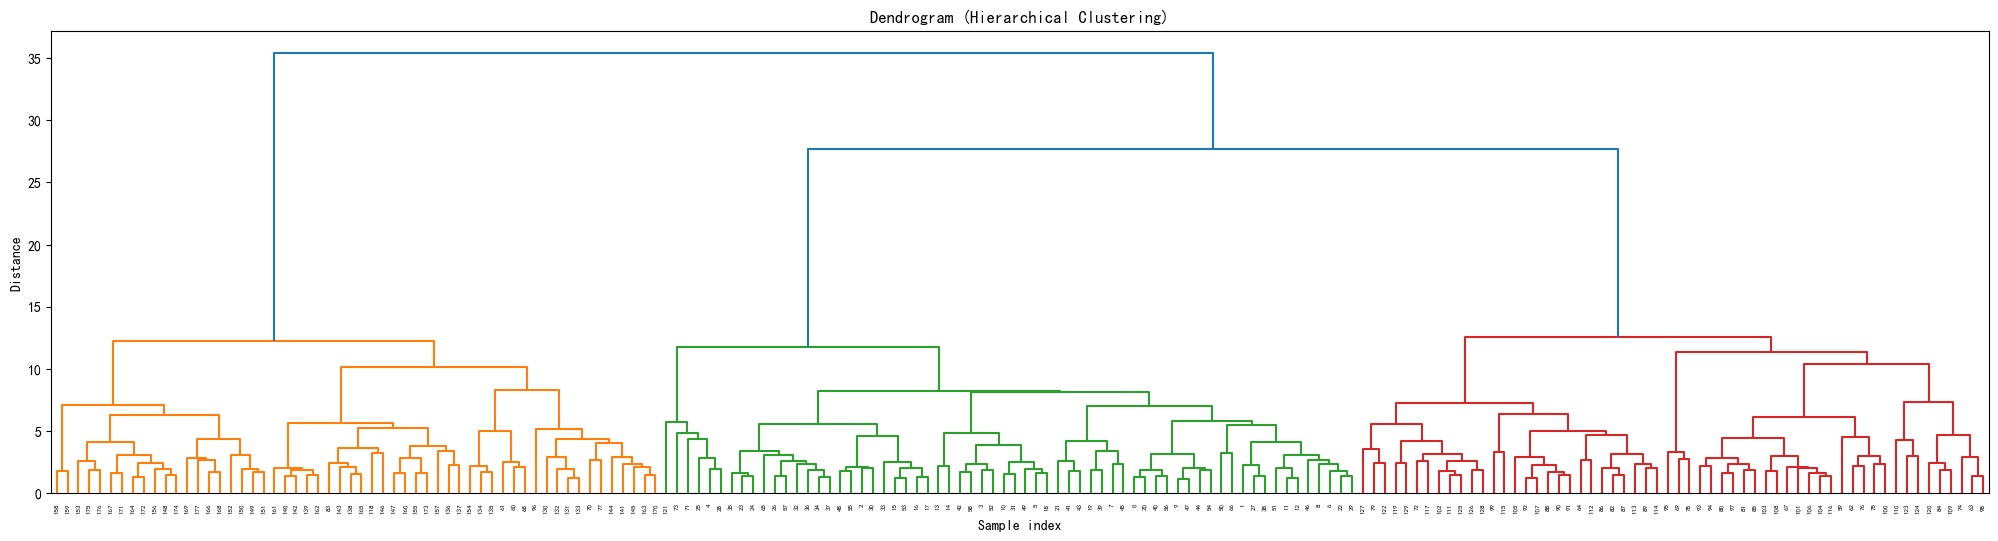

In [4]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(25, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


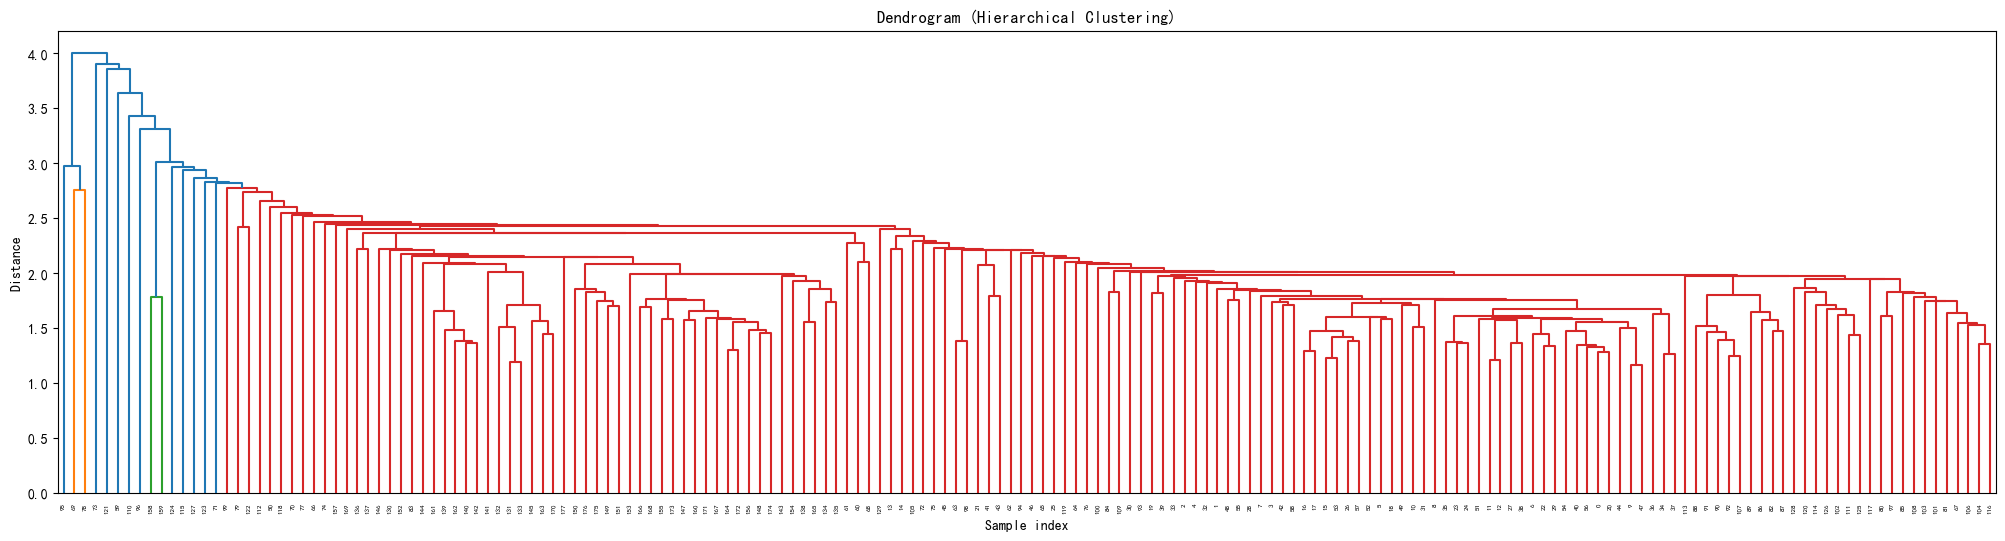

In [5]:
plt.figure(figsize=(25, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


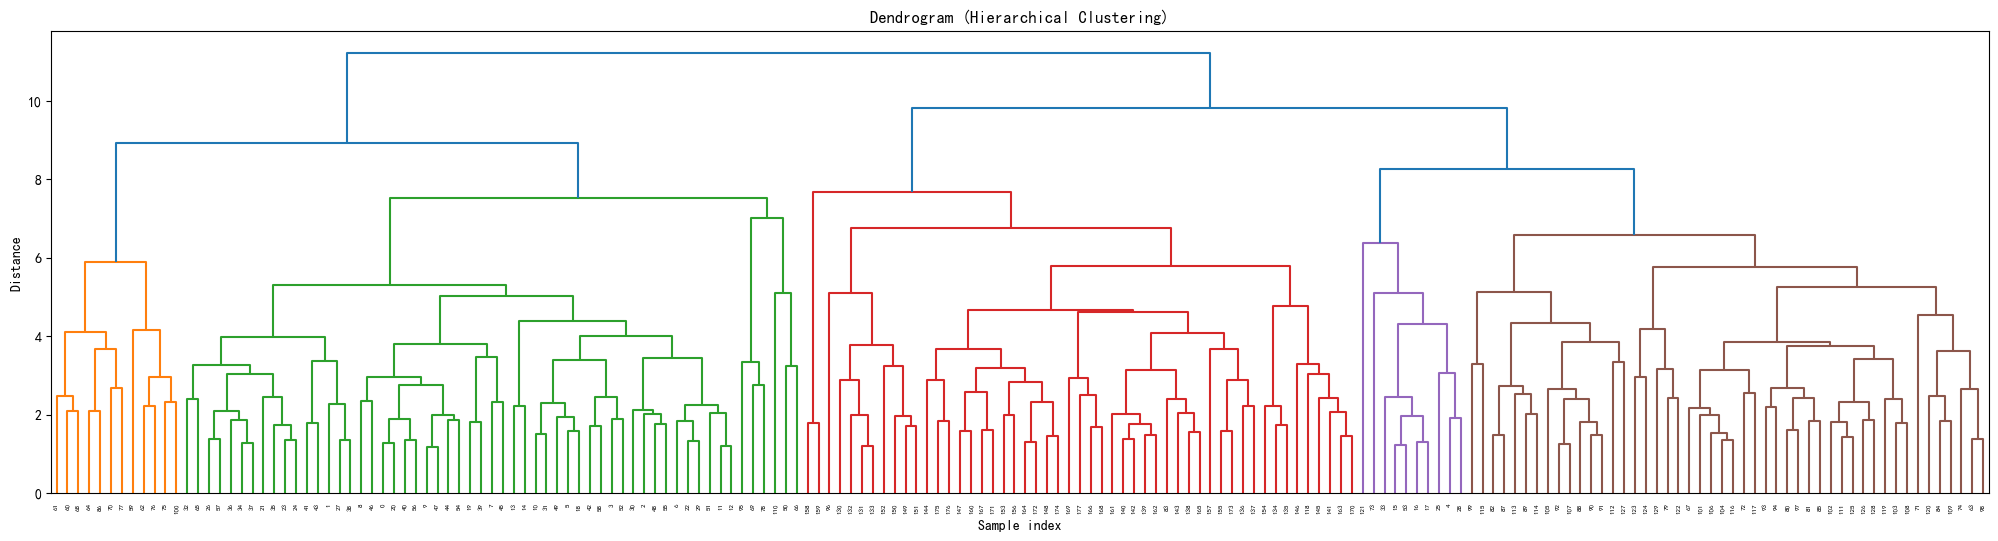

In [6]:
plt.figure(figsize=(25, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


- This helps you visually choose the number of clusters (look for the largest vertical gap you can cut across).

**Linkage Methods**

| Linkage Method       | How It Works                                                     | Characteristics                                                                              |
| -------------------- | ---------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Single linkage**   | Distance between **closest points** of two clusters              | Can result in "chain-like" clusters, sensitive to noise and outliers                         |
| **Complete linkage** | Distance between **farthest points** of two clusters             | Produces compact, tightly bound clusters; sensitive to outliers                              |
| **Average linkage**  | Average distance between **all pairs of points** across clusters | A balance between single and complete; smoother cluster boundaries                           |
| **Ward linkage**     | Minimize the **increase in total within-cluster variance**       | Tends to create clusters of similar size; best when using Euclidean distance and scaled data |


| Use Case                                 | Suggested Linkage                                                     |
| ---------------------------------------- | --------------------------------------------------------------------- |
| Want compact, equally-sized clusters     | **Ward**                                                              |
| Data has non-spherical shapes or noise   | **Average** or **Complete**                                           |
| You care about connectivity over density | **Single**                                                            |
| You’re not sure                          | Start with **Ward** (most commonly used, especially for numeric data) |


### Agglomerative Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Let's assume 3 clusters based on dendrogram or domain knowledge
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)


### Evaluate Clustering

In [8]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

print("Silhouette Score:", silhouette_score(X_scaled, y_hc))
print("Adjusted Rand Index (vs true labels):", adjusted_rand_score(y_true, y_hc))


Silhouette Score: 0.2774439826952266
Adjusted Rand Index (vs true labels): 0.7899332213582837


# ---------------------

In [10]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


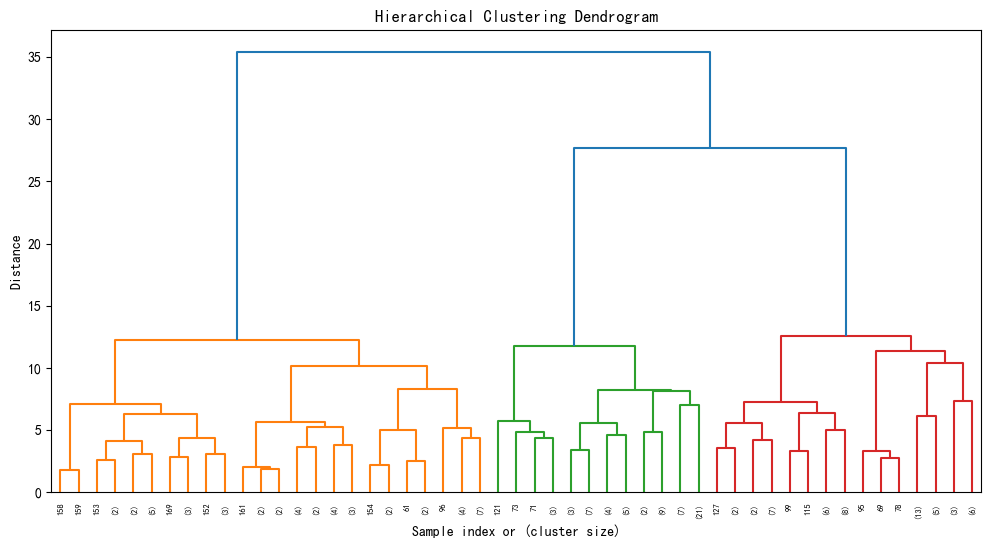

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method='ward')  # 'ward' minimizes within-cluster variance

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)  # Truncate for clearer view
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
# plt.grid(True)
plt.show()


In [15]:
from scipy.cluster.hierarchy import fcluster

# Let’s assume you choose 3 clusters based on the dendrogram.

cluster_labels = fcluster(Z, t=3, criterion='maxclust')


In [17]:
from sklearn.metrics import adjusted_rand_score

# Evaluate (optional, since Wine has true labels)
true_labels = data.target
ari = adjusted_rand_score(true_labels, cluster_labels)
print("Adjusted Rand Index:", round(ari, 3))


Adjusted Rand Index: 0.79


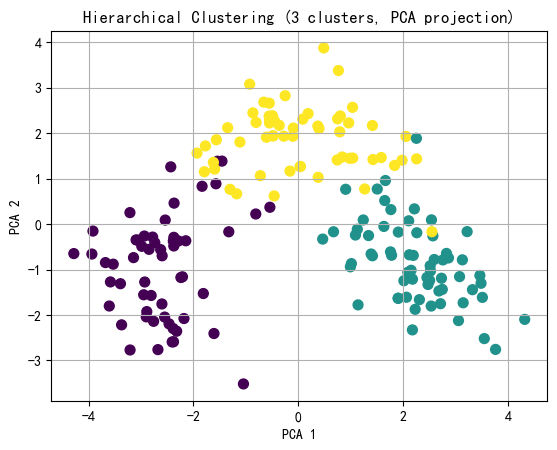

In [19]:
# Visualize the clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering (3 clusters, PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
